# ANOVA - One factor without Replication
# watch this video : https://www.youtube.com/watch?v=JgMFhKi6f6Y

## ANOVA = Analysis of Variance

Sample Variance = $\frac{\sum_{i=1}^{n}\left(x_i - \bar x\right)^2}{n-1}$

Sum of Square or SS =$\sum_{i=1}^{n}\left(x_i - \bar x\right)^2$

## SSC = Sum of square across columns = $\left(N-\right)\sum_{i=1}^{k}\left(\mu_i - \mu\right)^2$
## SSE = Sum of error (within groups) = $ \sum_{i=1}^{k}\sum_{j=1}^{N_i}\left(x_{ij} - \mu_i\right)^2$
## SST = Sum of square total = $\sum_{i=1}^{N}\left(x_i - \mu\right)^2$

## $MSC = \frac{SSC}{df_{columns}}$ and  $df_{columns} = C - 1$
## $MSE = \frac{SSE}{df_{error}}$ and  $df_{error} = N-C$
## $ F_{statistics} = \frac{MSC}{MSE}$

# We find out $F_{Critical}$ value by looking into F Distribution table with $F_{\alpha,df_C,df_E}$ as critical value to test HYPOTHESIS



# <span style='color:red'> Two way ANOVA without Replication </span> = RANDOMIZED BLOCK DESIGN
# 4 Types of Sum of Squares / Sources of Variance
# 1) TOTAL = 2/COLUMNS/GROUPS + <span style='color:red'> 3) ROWS/BLOCKS </span> + 4/ ERROR 

# Example
__In 2 factor ANOVA calculation we are 2 factors or dimensions through which we try to explain the overall (TOTAL) variance , this gives additional levers (2 factor) to help explainability and leave with ERROR (UNEXPLAINABLE). This helps in establishing HYPOTHESIS TEST.__

\begin{matrix}
 &      &Sydney  &Brisbane  &Melbourne \\ 
 &      &75  &75  &90 \\ 
 &Shopper 1&70  &70  &70 \\ 
 &Shopper 3&50  &55  &75 \\ 
 &Shopper 4&65  &60  &85 \\ 
 &Shopper 5&80  &65  &80 \\ 
 &Shopper 6&65  &65  &65 
\end{matrix}

## How each data point is deviated away from Overall Mean $\bar X$. Explainability of that comes from (a) variation of rating across cities (b) variation of rating across shoppers

## In one way ANOVA (Single factor), SST (Sum of Sqaure Total) = SSC + (SSE)
## In two way ANOVA (Single factor), SST (Sum of Sqaure Total) = SSC + (SSB+SSE)
## In the end SSC is compared to SSE, so the smaller SSE is, SSC can claim a larger part of SST.

## SSB = Take each row/block mean, take difference between block means and overall mean, square them and add them up
## SSE = SST-SSC-SSB (How much overall SSE did SSB account for)

## <span style='color:blue'> Interested to know the relationship between block variance and error variance </span>

## $\frac{SSB}{SSE}$ ==> divide by df ==> $\frac{MSB}{MSE}$
## Since this is ratio of two variances, it will be an F-ratio and follow F-distribution

## The whole idea of 2 way ANOVA is to testing stronger by increase explainability. With SSB introduction we eat up error from SSE (original) and make SSE smaller. The ratio MSC by MSE becomes more sensistive to establish test hypothesis, whether group means are significant or not.

We are interested for difference in the city score. SST score reflects upon total differences from the overall mean. Out of this difference of city factors and error contributes. If we could factor blocks then will help reduce overall error and __city difference factor__ will be more prominent.


# <span style='color:red'>Formula for 2 way block ANOVA</span>

## SSC = Sum of Squares (columns/treatments) , $df_{columns}=C-1$, MSC = $\frac{SSC}{df_{columns}}$
## SSB = Sum of Squares (Blocks), $df_{blocks} = B - 1, MSB =\frac{SSB}{df_{blocks}}$
## SSE = Sum of Squares (Within/Error), $df_{error}=(C-1)(B-1), MSE = \frac{SSE}{df_{error}}$
## SST = Sum of Squares (Total), $df_{total}=N-1, F = \frac{MSC}{MSE}$

## $F_{block}=\frac{MSB}{MSE}$
## $F_{column}=\frac{MSC}{MSE}$

# By reducing Error component, F values will be more prominent and sensitive in establishing HYPOTHESIS

# ANOVA is about teasing apart or partitioning the total/overall variance into different parts;Assigning parts of overall variance to different sources
# One of the source is always ERROR (Unexplained)

# <span style='color:green'> ANOVA - Two factor with Replication</span>

# <span style='color:red'>Practice using Pluralsight Bike Example</span>
- Perform ANOVA Test (1 factor) with weather category and testing bike rides

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
bike_sharing_data = pd.read_csv('datasets/bike_sharing_data_processed.csv')

In [3]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [4]:
bike_sharing_data.shape

(731, 7)

In [5]:
bike_sharing_data.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [6]:
bike_sharing_data.groupby(by='weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


# Descriptive Analysis: Boxplot Test

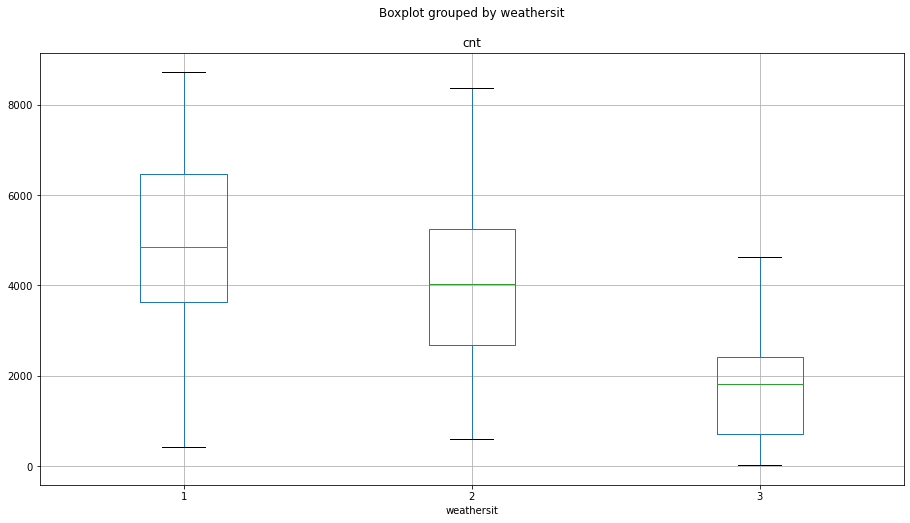

In [7]:
_=bike_sharing_data.boxplot(column=['cnt'], by='weathersit',figsize=(15,8))

# One way ANOVA test

In [8]:
stats.f_oneway(bike_sharing_data.cnt[bike_sharing_data.weathersit==1],
               bike_sharing_data.cnt[bike_sharing_data.weathersit==2],
               bike_sharing_data.cnt[bike_sharing_data.weathersit==3])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

## <span style='color:red'>Conclusion: P Value is very tiny, meaning weather condition does play a role in number of bike rides</span>
## Anaova test gives us the indication that means are different but doesn't tell us which specific group's means compared with each other are different.

## TUKEY'S HONEST SIGNIFICANCE DIFFERENCE TEST (HSD)

# Play this video for Tukey's HSD https://www.youtube.com/watch?v=zQr190cacC0

In [9]:
from statsmodels.stats.multicomp import MultiComparison

In [10]:
mul_com = MultiComparison(bike_sharing_data.cnt,bike_sharing_data.weathersit)
mul_result = mul_result = mul_com.tukeyhsd()
print(mul_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


# <span style='color:red'> Implementing 2 Way ANOVA Analysis </span>
__Influence of 2 categorical variables on one dependent continuous variable  
Weather and Seasons influences Ride Count ?__

In [13]:
bike_sharing_data.groupby(by='weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


In [25]:
rp.summary_cont(bike_sharing_data.groupby('weathersit')['cnt'])

,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


<AxesSubplot:title={'center':'cnt'}, xlabel='weathersit'>

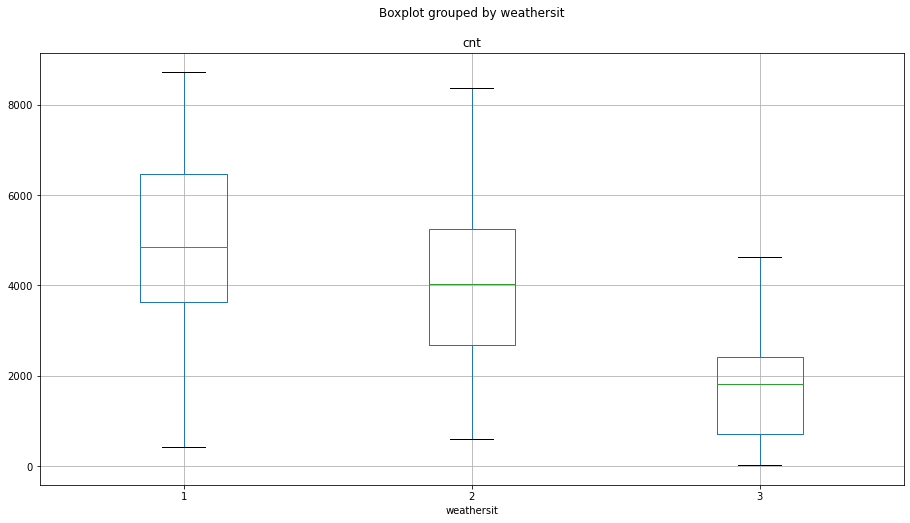

In [11]:
bike_sharing_data.boxplot(column=['cnt'],by='weathersit',figsize=(15,8))

In [27]:
rp.summary_cont(bike_sharing_data.groupby('season'))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


<AxesSubplot:title={'center':'cnt'}, xlabel='season'>

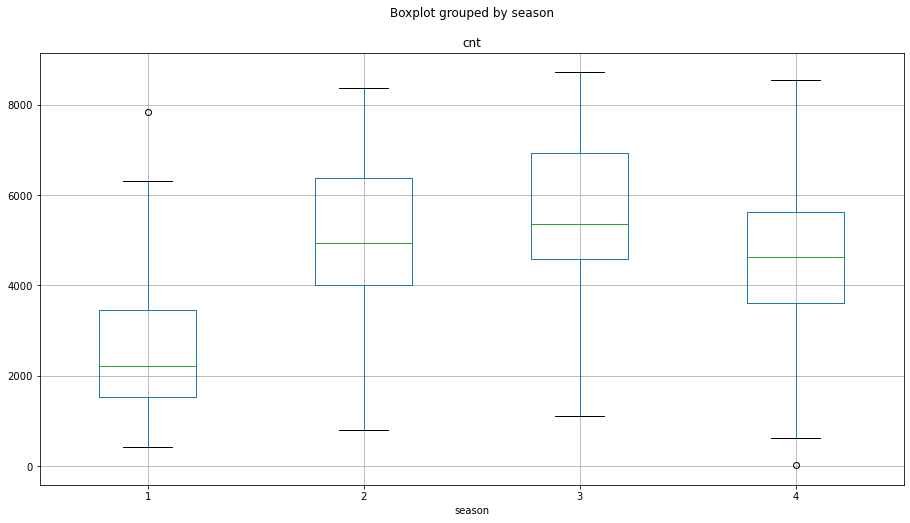

In [26]:
bike_sharing_data.boxplot(column='cnt',by='season',figsize=(15,8))

# Perform REGRESSION ANALYSIS between count 'cnt' and weather situation 'weathersit'

In [15]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


# <span style='color:red'>$R^2:$COEFFICIENT of DETERMINATION is a measure of how much of the variation in Y is explained by Model </span>
#  $R^2:\frac{Regression Sum of Squares}{Total Sum of Squares}$
## Regression Sum of Squares SSR = $\sum\left(\hat y - \bar y\right)^2$
## Error Sum of Squares            SSE = $\sum\left(y_i -\hat y_i\right)^2$
## Total Sum of Square              SSTO= $\sum \left(y_i - \bar y\right)^2$
## For linear REGRESSION SSTO = SSR + SSE
## $R^2 =\frac{SSTO-SSE}{SSTO} = 1 - \frac{SSE}{SSTO}$
## Mean SSE = MSE = SSE/DF = SSE/(n-p), p = parameters
## Mean SSTO = SSTO/(n-1)
## <span style='color:blue'>Adjusted $R^2 = 1- \frac{\frac{SSE}{n-p}}{\frac{SSTO}{n-1}}$</span>
## <span style='color:red'>$R^2_a=1 - \frac{MSE}{MSTO}$</span>
## <span style='color:red'>$R^2_a=R^2 - \left(\frac{p-1}{n-p}\right)\left(1-R^2\right)$</span>


## Before we

# Information Criteria ($\chi$ IC)
# $\chi IC=-2ln(L)+complexity term$; L = maximixed likelihood, commonly returned by SW
# Minimum is the Information Criteria , better is the model
# What is L 
## for IID - Independent Identically Distributed Error (Normally distributed)
## $L = \left(\frac{1}{\sqrt(2\pi \sigma_{\varepsilon})}\right)^n\exp[-\frac{\chi^2}{2}]$
## $\chi =\sum^n_i\left(\frac{\varepsilon_i}{\sigma_{\varepsilon}}\right)^2$
# <span style='color:red'>AIC = Akaike Information Criteria = -2ln(L) + 2p</span>
# <span style='color:red'>BIC = Baysean Information Criteria = -2ln(L)+p*ln(n)</span>

# <span style='color:green'> Comparing Models : $R^2_a$ (Results in larger p)vs AIC (Most popular Choice)vs BIC(Results in smaller p)</span>

## Let's regress and find out linear relationship between regression variables and Ride Counts

In [17]:
model = ols("cnt ~ C(weathersit)", bike_sharing_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           3.11e-17
Time:                        06:29:44   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [30]:
model=ols('cnt ~ C(season)',bike_sharing_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           6.72e-67
Time:                        13:19:49   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

# Summary from last 2 ORDINARY LEAST SQUARE: F Statistics are high and Prob (F Statistics) quite low indicates regression is significant
## All regressing variables (Categorical variables though) t statistics are high and Prob(t) almost 0 indicates all variables are significant for Bike Rides Count  

# <span style='color:red'> Regression Analysis considering both WEATHER Situation and SEASONS </span>

In [31]:
model=ols('cnt ~C(weathersit)+C(season)',bike_sharing_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.13e-87
Time:                        13:28:39   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

In [33]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


# Consider Interaction between WEATHER SITUATION and SEASON

In [36]:
model=ols('cnt ~ C(weathersit)*C(season)',bike_sharing_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           5.25e-85
Time:                        13:36:20   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [37]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN


### End of topic ####

In [ ]:
End of Topic - Testing